# DL ASSIGNMENT PYTHON CODES
## JUSTIN NG ZHENG XIN (TP069603)

# 1.0 Initial Setup

In [2]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random as rn
import tensorflow as tf

In [3]:
# Defining function to set seed for ensuring reproducibility of the experiments
def set_seed(seed):
    np.random.seed(seed)
    rn.seed(seed)
    tf.random.set_seed(seed)
    
    return

In [4]:
# Setting seed
set_seed(10)

In [5]:
# Scrapping S&P500 index dataset from yahoo finance API

# Defining S&P500 ticker abbreviation and date range 
ticker = "^GSPC"
start_date = "1983-05-01"
end_date = "2023-05-01"

# Fetching S&P500 index
ds = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


# 2.0 EDA

In [6]:
# Checking for the shape of dataset 
print(ds.shape)

(10082, 6)


In [7]:
# Viewing 1st 5 rows of dataset
ds.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-05-02,164.410004,164.419998,161.990005,162.110001,162.110001,88170000
1983-05-03,162.100006,162.350006,160.800003,162.339996,162.339996,89550000
1983-05-04,162.380005,163.639999,162.380005,163.309998,163.309998,101690000
1983-05-05,163.350006,164.300003,163.350006,164.279999,164.279999,107860000
1983-05-06,164.300003,166.990005,164.300003,166.100006,166.100006,128200000


In [8]:
# Checking for attributes of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10082 entries, 1983-05-02 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10082 non-null  float64
 1   High       10082 non-null  float64
 2   Low        10082 non-null  float64
 3   Close      10082 non-null  float64
 4   Adj Close  10082 non-null  float64
 5   Volume     10082 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 551.4 KB


In [9]:
# Generating summary statistics of dataset
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10082.000000,10082.000000,10082.000000,10082.000000,10082.000000,1.008200e+04
mean,1310.817931,1318.662439,1302.419337,1311.086817,1311.086817,2.046647e+09
std,1050.946108,1056.946321,1044.443718,1051.060916,1051.060916,1.895886e+09
min,147.820007,149.279999,147.259995,147.820007,147.820007,1.499000e+07
25%,444.719994,447.115005,442.574997,444.874992,444.874992,2.504325e+08
50%,1134.385010,1142.180054,1126.775024,1134.420044,1134.420044,1.389500e+09
75%,1582.662506,1591.747498,1577.442535,1584.545013,1584.545013,3.610652e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [10]:
# Checking for number of duplicates
duplicate_rows = ds.duplicated()
num_duplicates = duplicate_rows.sum()
print(num_duplicates)

0


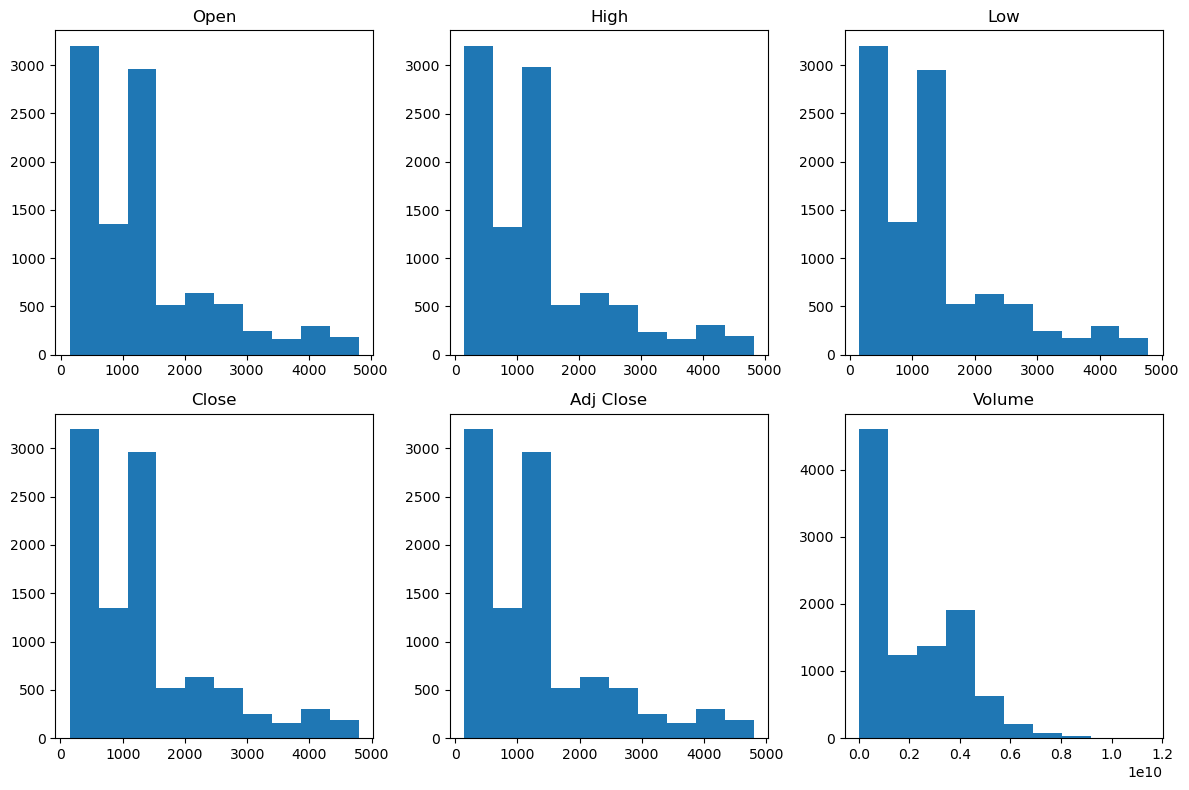

In [11]:
# Checking distribution of each numerical variable

# Creating 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Defining list of numerical variables
variables = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Loop each numerical variable and create histogram for each numerical variable in a subplot
for i, variable in enumerate(variables):
    row = i // 3  # calculate row index
    col = i % 3   # calculate column index
    axs[row, col].hist(ds[variable])
    axs[row, col].set_title(variable)

plt.tight_layout()
plt.show()

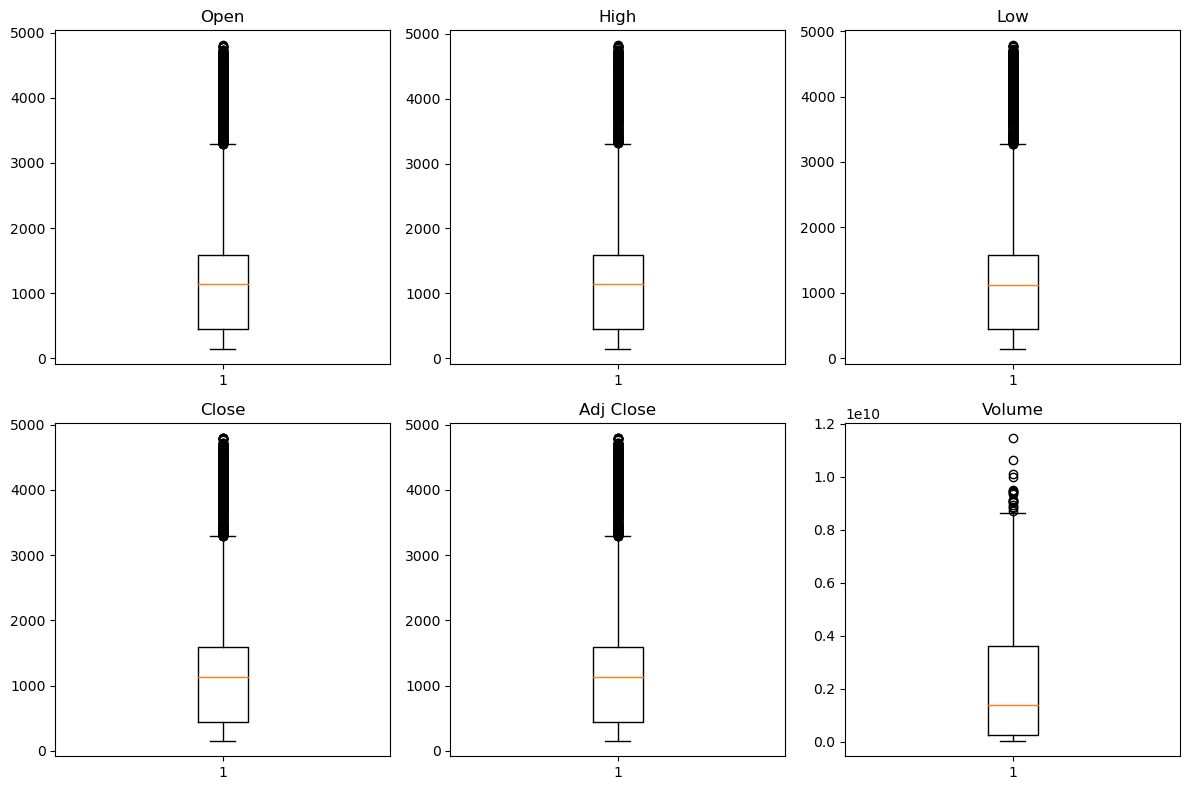

In [12]:
# Checking distribution of each numerical variable

# Creating 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Defining list of numerical variables
variables = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Loop each numerical variable and create boxplot for each numerical variable in a subplot
for i, variable in enumerate(variables):
    row = i // 3  # calculate row index
    col = i % 3   # calculate column index
    axs[row, col].boxplot(ds[variable])
    axs[row, col].set_title(variable)

plt.tight_layout()
plt.show()

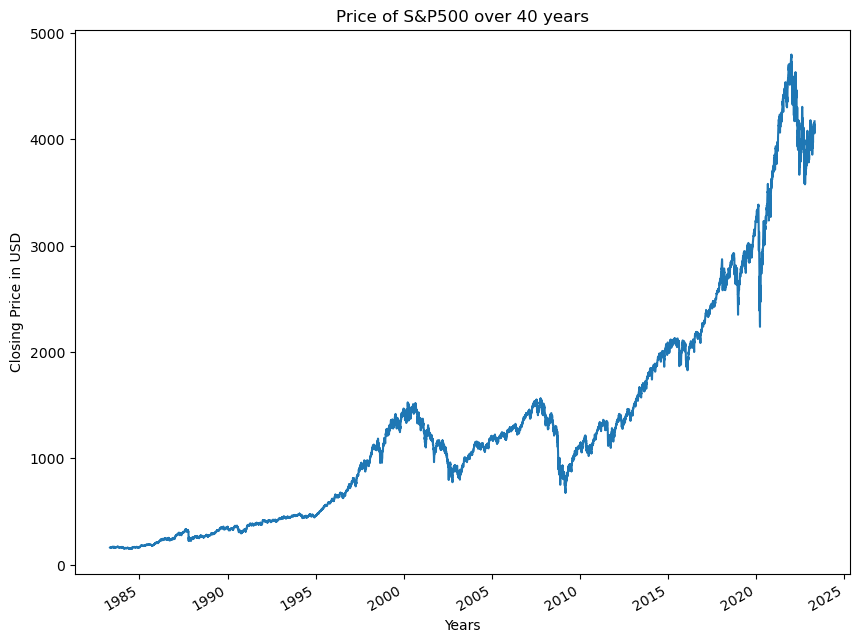

In [13]:
# Illustrating price of S&P500 from start to end of date range
fig, ax = plt.subplots(figsize = (10, 8))
ds["Close"].plot(ax = ax)
ax.set_title("Price of S&P500 over 40 years")
ax.set_xlabel("Years")
ax.set_ylabel("Closing Price in USD")

plt.show()

Overall, the performance of S&P500 index generally exhibits an upward trend over the past 40 years. It was also observed that the S&P500 experienced a significant peak from 2009 onwards, but currently it is slightly under performing.

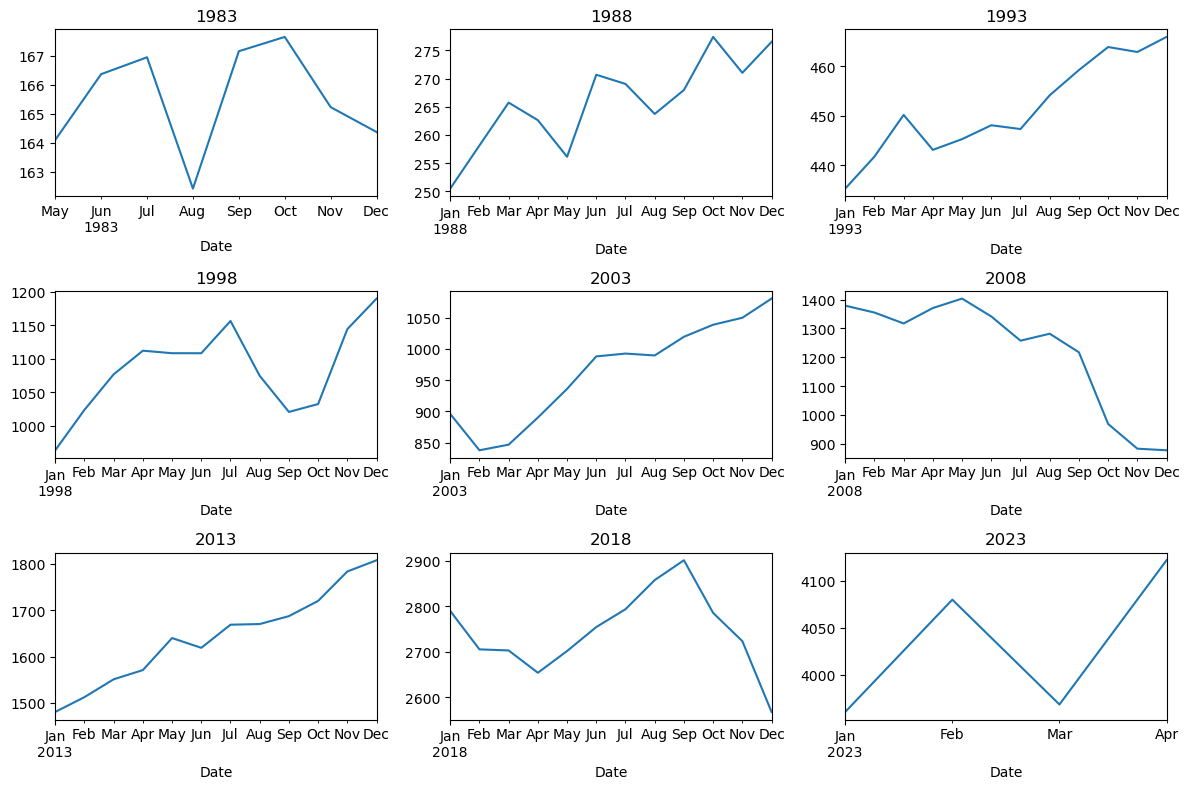

In [14]:
# Checking for seasonality (every 5 years)

# Creating 3x3 subplot grid
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
ax = ax.flatten()

# Resampling "Close" variable to monthly frequency
ds_monthly = ds["Close"].resample('M').mean()

# Defining list of years 
years = ["1983", "1988", "1993", "1998", "2003", "2008", "2013", "2018", "2023"]

for index, year in enumerate(years):
    ds_monthly[year].plot(ax=ax[index])
    ax[index].set_title(year)

plt.tight_layout()
plt.show()


# 3.0 Pre-processing

### 3.1 Data manipulation

In [15]:
# Dropping unessary variables to the prediction
ds.drop(['Adj Close'], axis=1, inplace=True)

ds.head()

,Open,High,Low,Close,Volume
Date,,,,,
1983-05-02,164.410004,164.419998,161.990005,162.110001,88170000
1983-05-03,162.100006,162.350006,160.800003,162.339996,89550000
1983-05-04,162.380005,163.639999,162.380005,163.309998,101690000
1983-05-05,163.350006,164.300003,163.350006,164.279999,107860000
1983-05-06,164.300003,166.990005,164.300003,166.100006,128200000


In [16]:
# Rearranging the columns with target variable at the last column
ds = ds[["Open", "High", "Low", "Volume", "Close"]]

ds.head()

,Open,High,Low,Volume,Close
Date,,,,,
1983-05-02,164.410004,164.419998,161.990005,88170000,162.110001
1983-05-03,162.100006,162.350006,160.800003,89550000,162.339996
1983-05-04,162.380005,163.639999,162.380005,101690000,163.309998
1983-05-05,163.350006,164.300003,163.350006,107860000,164.279999
1983-05-06,164.300003,166.990005,164.300003,128200000,166.100006


### 3.2 Normalization


In [17]:
# Defining scaler for independent variables
x_scaler = MinMaxScaler(feature_range = (0,1))

# Input columns
input_col = ds.iloc[:,:4].values

# Normalizing independent variables 
x_scaled = x_scaler.fit_transform(input_col)
x_scaled

array([[0.00356262, 0.00324243, 0.00317952, 0.00639616],
       [0.00306656, 0.00279911, 0.00292265, 0.00651678],
       [0.00312668, 0.00307538, 0.0032637 , 0.00757785],
       ...,
       [0.846086  , 0.84388582, 0.8422783 , 0.3340582 ],
       [0.84340384, 0.85428779, 0.84787752, 0.32649958],
       [0.85507304, 0.86110242, 0.85907817, 0.35597628]])

In [18]:
# Defining scaler for target variable
y_scaler = MinMaxScaler(feature_range = (0,1))

# Input columns
target_col = ds.iloc[:,-1].values

# Normalizing target variable
y_scaled = y_scaler.fit_transform(target_col.reshape(-1,1))
y_scaled

array([[0.00307395],
       [0.00312342],
       [0.00333208],
       ...,
       [0.84069445],
       [0.85776577],
       [0.86510752]])

In [19]:
# Merging the normalized input and target variables
sc_ds = np.hstack((x_scaled, y_scaled))

print(sc_ds)

[[0.00356262 0.00324243 0.00317952 0.00639616 0.00307395]
 [0.00306656 0.00279911 0.00292265 0.00651678 0.00312342]
 [0.00312668 0.00307538 0.0032637  0.00757785 0.00333208]
 ...
 [0.846086   0.84388582 0.8422783  0.3340582  0.84069445]
 [0.84340384 0.85428779 0.84787752 0.32649958 0.85776577]
 [0.85507304 0.86110242 0.85907817 0.35597628 0.86510752]]


### 3.3 Spliting dataset into train-test sets

In [20]:
#Train-test split with a ratio of 80:20
train, test = train_test_split(sc_ds, test_size=0.2, shuffle = False, random_state=1)

print(train.shape)
print(test.shape)

(8065, 5)
(2017, 5)


### 3.4 Preparing dataset for timeseries forecasting - Sliding Window Generation

In [21]:
# Defining function to split multivariate sequences into input and output
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# finding the end of n_steps
		end_ix = i + n_steps
		# check if the end_index is beyond the length of the sequence, if it is then break 
		if end_ix > len(sequences):
			break
		# to concat input and output 
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y) # changing data type to array

In [22]:
# Splitting train set into input and target
x_train, y_train = split_sequences(train,30) # utilizing time_step of 30 days

In [23]:
# Displaying shape of input variables in train set
x_train.shape

(8036, 30, 4)

In [24]:
# Displaying shape of target variable in train set
y_train.shape

(8036,)

In [25]:
# Splitting test set into input and target
x_test, y_test = split_sequences(test, 30) # utilizing time_step of 30 days

In [26]:
# Displaying shape of input variables in test set
x_test.shape

(1988, 30, 4)

In [27]:
# Displaying shape of target variable in test set
y_test.shape

(1988,)

# 4.0 Modelling & Optimization

In [32]:
# Importing all neccesary modelling & optimization libraries
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [33]:
# Defining kernel initializer to initialize the weights of the neural networks with a specific seed
# To ensure reproducibility of all models' result and convergence
initializer = tf.keras.initializers.GlorotUniform(seed=10)  

### 4.1 Baseline LSTM model

In [34]:
# Defining function for baseline LSTM model 
def lstm_func(optimizer="adam", activation='relu'):
    model = Sequential()
    # Input layer
    model.add(InputLayer(input_shape=(30,4)))
    # LSTM hidden layer
    model.add(LSTM(units = 32, return_sequences = False, activation=activation, 
                   kernel_initializer=initializer))
    # Output layer
    model.add(Dense(units = 1, kernel_initializer=initializer))
    # Compile model
    model.compile(optimizer=optimizer, loss='mse')
    return(model)

In [35]:
# Creating LSTM model
lstm = lstm_func()

In [36]:
# LSTM model summary
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Model training

# Setting seed
set_seed(10)

# Fitting LSTM model with training data
lstm_history = lstm.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size=32)

Epoch 1/100
201/201 [==============================] - 4s 12ms/step - loss: 0.0013 - val_loss: 9.0494e-05
Epoch 2/100
201/201 [==============================] - 2s 11ms/step - loss: 1.0946e-05 - val_loss: 8.3406e-05
Epoch 3/100
201/201 [==============================] - 2s 11ms/step - loss: 9.7395e-06 - val_loss: 5.9590e-05
Epoch 4/100
201/201 [==============================] - 2s 12ms/step - loss: 9.3219e-06 - val_loss: 5.0027e-05
Epoch 5/100
201/201 [==============================] - 2s 11ms/step - loss: 8.9108e-06 - val_loss: 4.8423e-05
Epoch 6/100
201/201 [==============================] - 2s 12ms/step - loss: 8.5359e-06 - val_loss: 7.0121e-05
Epoch 7/100
201/201 [==============================] - 2s 12ms/step - loss: 7.8695e-06 - val_loss: 5.3004e-05
Epoch 8/100
201/201 [==============================] - 2s 10ms/step - loss: 7.7962e-06 - val_loss: 4.1439e-05
Epoch 9/100
201/201 [==============================] - 2s 11ms/step - loss: 7.6407e-06 - val_loss: 3.0893e-05
Epoch 10/100
2

Epoch 75/100
201/201 [==============================] - 2s 10ms/step - loss: 2.0810e-06 - val_loss: 5.2263e-06
Epoch 76/100
201/201 [==============================] - 2s 10ms/step - loss: 1.9374e-06 - val_loss: 4.7002e-06
Epoch 77/100
201/201 [==============================] - 2s 10ms/step - loss: 1.8654e-06 - val_loss: 2.9896e-06
Epoch 78/100
201/201 [==============================] - 2s 10ms/step - loss: 1.8344e-06 - val_loss: 5.9974e-06
Epoch 79/100
201/201 [==============================] - 2s 10ms/step - loss: 1.6202e-06 - val_loss: 6.2600e-06
Epoch 80/100
201/201 [==============================] - 2s 10ms/step - loss: 1.8638e-06 - val_loss: 3.7508e-06
Epoch 81/100
201/201 [==============================] - 2s 11ms/step - loss: 1.7258e-06 - val_loss: 3.4861e-06
Epoch 82/100
201/201 [==============================] - 2s 10ms/step - loss: 1.5904e-06 - val_loss: 3.2462e-06
Epoch 83/100
201/201 [==============================] - 2s 10ms/step - loss: 1.6791e-06 - val_loss: 4.2103e-06
E

In [38]:
# Predicting using LSTM model
lstm_predict = lstm.predict(x_test)

# Inverse scaling the prediction
lstm_predict = y_scaler.inverse_transform(lstm_predict)

63/63 [==============================] - 1s 4ms/step


In [39]:
# Inverse scaling the target in test set 
real_price = y_scaler.inverse_transform(np.reshape(y_test, (-1,1)))

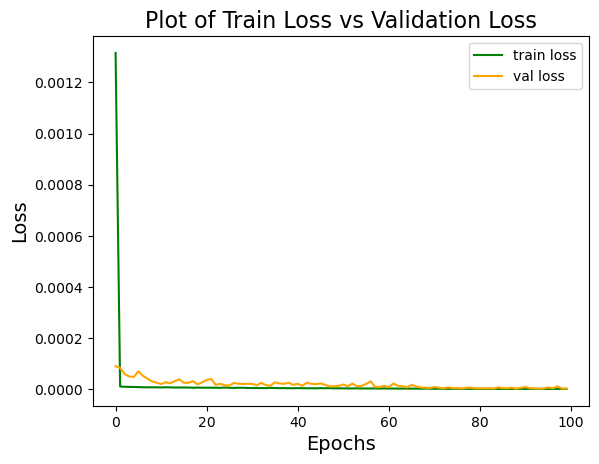

In [65]:
# Plotting LSTM model's train and validation loss
plt.title('Plot of Train Loss vs Validation Loss', fontsize=16)
plt.plot(lstm_history.history['loss'], color='green', label='train loss')
plt.plot(lstm_history.history['val_loss'], color='orange', label='val loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

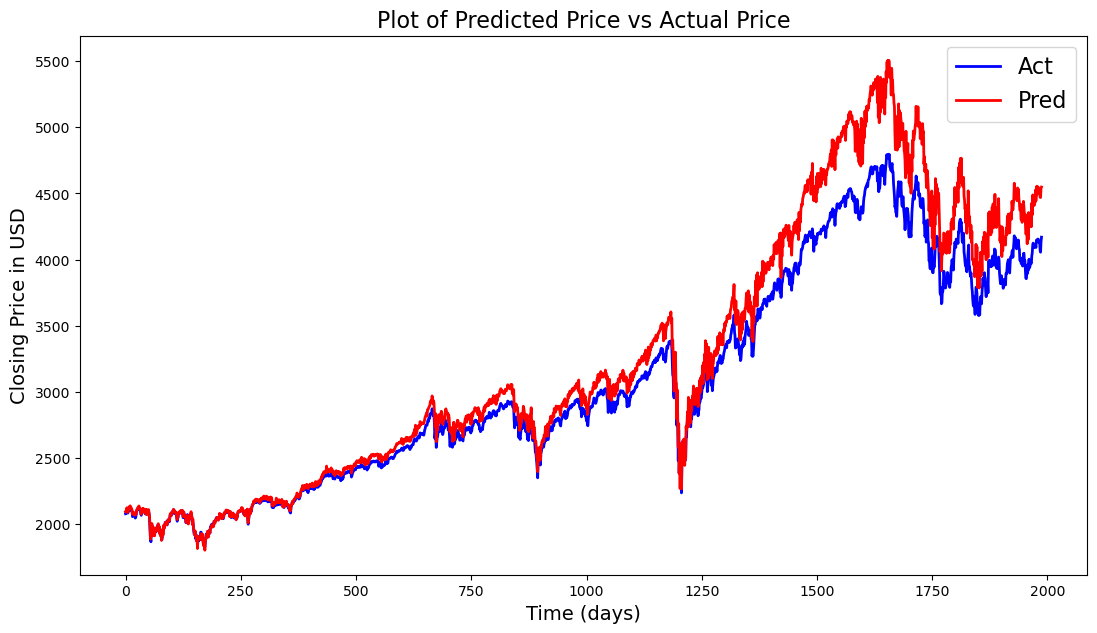

In [41]:
# Plotting LSTM model's predicted price vs real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, color='blue', label='Act', linewidth=2)
ax.plot(lstm_predict, color='red', label='Pred', linewidth=2)
ax.set_xlabel('Time (days)', fontsize=14)
ax.set_ylabel('Closing Price in USD', fontsize=14)
ax.set_title('Plot of Predicted Price vs Actual Price', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [42]:
# Defining function to generate RMSE and MAE
def metrics(real, predicted):
  RMSE = np.sqrt(mean_squared_error(real, predicted))
  MAE = mean_absolute_error(real, predicted)
  print("RMSE =", RMSE)
  print("MAE =", MAE)

In [43]:
# Generating RMSE and MAE results of LSTM model
metrics(real_price, lstm_predict)

RMSE = 246.91621588973885
MAE = 174.16627652880172


### 4.2 Baseline GRU model

In [44]:
# Defining function for baseline GRU model
def gru_func(optimizer="adam", activation='relu'):
  model = Sequential()
  # Input layer
  model.add(InputLayer(input_shape=(30,4)))
  # GRU hidden layer
  model.add(GRU(units = 32, return_sequences = False, activation=activation, 
                kernel_initializer=initializer))  
  # Output layer
  model.add(Dense(units = 1, kernel_initializer=initializer))
  # Compile model
  model.compile(optimizer=optimizer, loss='mse')
  return(model)

In [45]:
# Creating GRU model
gru = gru_func()

In [46]:
# GRU model summary
gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3648      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,681
Trainable params: 3,681
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Model training

# Setting seed
set_seed(10)

# Fitting GRU model with training data
gru_history = gru.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size=32)

Epoch 1/100
201/201 [==============================] - 4s 11ms/step - loss: 0.0023 - val_loss: 6.5021e-04
Epoch 2/100
201/201 [==============================] - 2s 10ms/step - loss: 1.4691e-05 - val_loss: 1.4773e-04
Epoch 3/100
201/201 [==============================] - 2s 10ms/step - loss: 8.3940e-06 - val_loss: 1.4068e-04
Epoch 4/100
201/201 [==============================] - 2s 10ms/step - loss: 7.2164e-06 - val_loss: 1.1312e-04
Epoch 5/100
201/201 [==============================] - 3s 13ms/step - loss: 6.4757e-06 - val_loss: 1.2788e-04
Epoch 6/100
201/201 [==============================] - 2s 11ms/step - loss: 6.1187e-06 - val_loss: 1.0446e-04
Epoch 7/100
201/201 [==============================] - 2s 11ms/step - loss: 5.7513e-06 - val_loss: 1.0451e-04
Epoch 8/100
201/201 [==============================] - 2s 11ms/step - loss: 5.6813e-06 - val_loss: 8.6037e-05
Epoch 9/100
201/201 [==============================] - 2s 10ms/step - loss: 5.4858e-06 - val_loss: 9.1652e-05
Epoch 10/100
2

Epoch 75/100
201/201 [==============================] - 2s 10ms/step - loss: 2.0455e-06 - val_loss: 5.9797e-05
Epoch 76/100
201/201 [==============================] - 2s 10ms/step - loss: 1.7689e-06 - val_loss: 4.4834e-05
Epoch 77/100
201/201 [==============================] - 2s 10ms/step - loss: 1.8273e-06 - val_loss: 6.0826e-05
Epoch 78/100
201/201 [==============================] - 2s 12ms/step - loss: 1.6281e-06 - val_loss: 6.2353e-05
Epoch 79/100
201/201 [==============================] - 2s 11ms/step - loss: 1.4489e-06 - val_loss: 5.8826e-05
Epoch 80/100
201/201 [==============================] - 2s 10ms/step - loss: 1.6041e-06 - val_loss: 6.8704e-05
Epoch 81/100
201/201 [==============================] - 2s 12ms/step - loss: 1.6662e-06 - val_loss: 5.3856e-05
Epoch 82/100
201/201 [==============================] - 2s 10ms/step - loss: 1.6810e-06 - val_loss: 5.8436e-05
Epoch 83/100
201/201 [==============================] - 2s 10ms/step - loss: 1.4064e-06 - val_loss: 5.5918e-05
E

In [48]:
# Predicting using GRU model
gru_predict = gru.predict(x_test)

# Inverse scaling the prediction
gru_predict = y_scaler.inverse_transform(gru_predict)

63/63 [==============================] - 0s 3ms/step


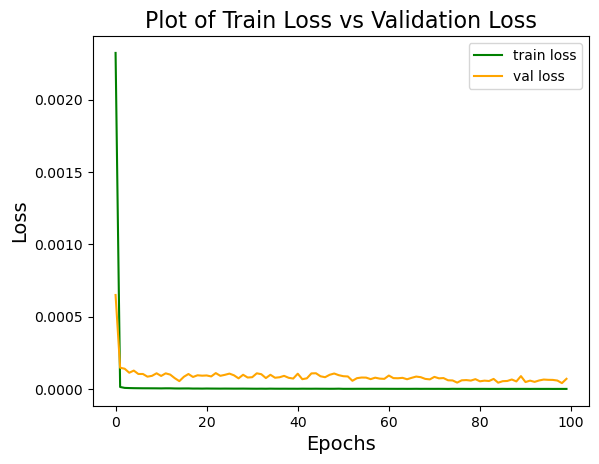

In [64]:
# Plotting GRU model's train and validation loss
plt.title('Plot of Train Loss vs Validation Loss', fontsize=16)
plt.plot(gru_history.history['loss'], color='green', label='train loss')
plt.plot(gru_history.history['val_loss'], color='orange', label='val loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

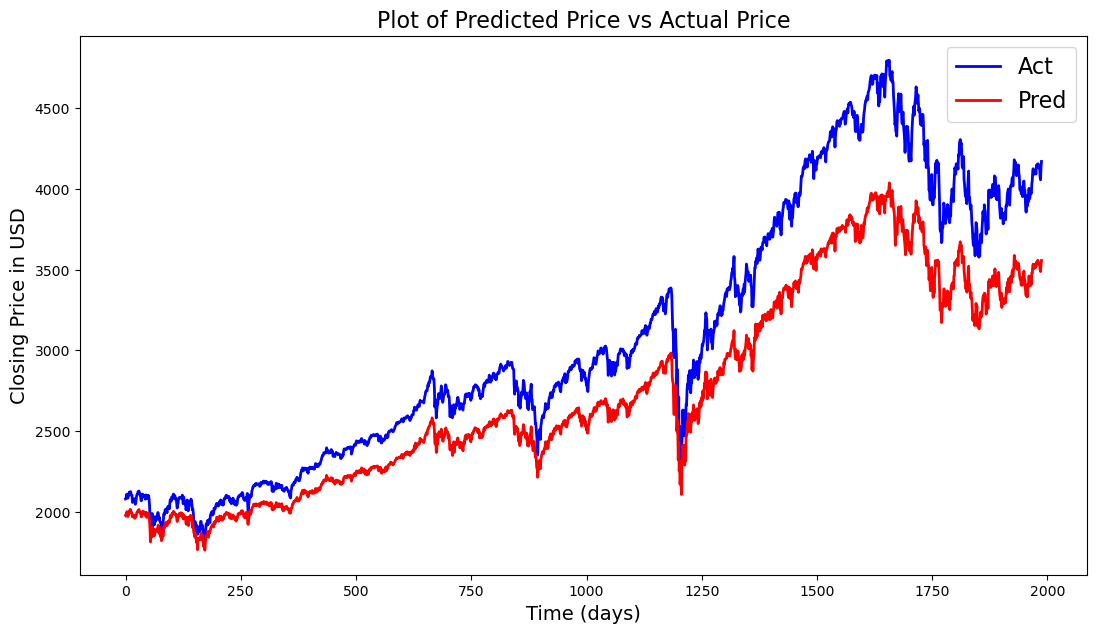

In [50]:
# Plotting GRU model's predicted price vs real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, color='blue', label='Act', linewidth=2)
ax.plot(gru_predict, color='red', label='Pred', linewidth=2)
ax.set_xlabel('Time (days)', fontsize=14)
ax.set_ylabel('Closing Price in USD', fontsize=14)
ax.set_title('Plot of Predicted Price vs Actual Price', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [51]:
# Generating RMSE and MAE results of GRU model
metrics(real_price, gru_predict)

RMSE = 390.2563286341996
MAE = 337.74529458243603


#### Therefore, as the LSTM model performed better with a lower RMSE and MAE value, the LSTM model will be further optimized through hyperparamter tuning.

### 4.3 Hyperparameter tuning LSTM model for epoch & batch size

In [63]:
# Hyperparameters tuning via grid search for epoch & batch size

# Setting seed
set_seed(10)

# Creating LSTM model for tuning
lstm_model = KerasRegressor(build_fn=lstm_func, verbose=0)

# Defining the grid search hyperparameters
batch_size = [16, 32, 64]
epochs = [50, 100, 150]
hyper_grid = dict(batch_size=batch_size, epochs=epochs)

# Grid search
grid = GridSearchCV(estimator=lstm_model, param_grid=hyper_grid, n_jobs=-1, cv=3)
epoch_batch_size = grid.fit(x_train, y_train)

# Printing the best hyperparameter and score
print("Best Result:", epoch_batch_size.best_params_)
print("Best Score:", epoch_batch_size.best_score_)

C:\Users\USER\AppData\Local\Temp\ipykernel_19052\430024331.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=lstm_func, verbose=0)


Best Result: {'batch_size': 32, 'epochs': 150}
Best Score: -4.653517635233584e-06


### 4.4 Hyperparameter tuning LSTM model for optimizer algorithm

In [48]:
# Hyperparameters tuning via grid search for optimizer algorithm

# Setting seed
set_seed(10)

# Creating LSTM model for tuning
lstm_model = KerasRegressor(build_fn=lstm_func, verbose=0)

# Defining the grid search hyperparameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
hyper_grid = dict(optimizer=optimizer)

# Grid search
grid = GridSearchCV(estimator=lstm_model, param_grid=hyper_grid, n_jobs=-1, cv=3)
optimizer_result = grid.fit(x_train, y_train)

# Printing the best hyperparameter and score
print("Best Optimizer Algorithm:", optimizer_result.best_params_)
print("Best Score:", optimizer_result.best_score_)

C:\Users\USER\AppData\Local\Temp\ipykernel_19052\2222301372.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=lstm_func, verbose=0)


Best Optimizer Algorithm: {'optimizer': 'Adam'}
Best Score: -9.525571173677842e-05


### 4.5 Hyperparameter tuning LSTM model for activation function

In [49]:
# Hyperparameters tuning via grid search for activation function

# Setting seed
np.random.seed(10)

# Creating LSTM model for tuning
lstm_model = KerasRegressor(build_fn=lstm_func, verbose=0)

# Defining the grid search hyperparameters
activation = ['relu', 'tanh', 'linear']
hyper_grid = dict(activation=activation)

# Grid search
grid = GridSearchCV(estimator=lstm_model, param_grid=hyper_grid, n_jobs=-1, cv=3)
activation_result = grid.fit(x_train, y_train)

# Printing the best hyperparameter and score
print("Best Activation Function:", activation_result.best_params_)
print("Best Score:", activation_result.best_score_)

C:\Users\USER\AppData\Local\Temp\ipykernel_19052\309030433.py:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=lstm_func, verbose=0)


Best Activation Function: {'activation': 'tanh'}
Best Score: -0.00011956147864111699


### 4.6 Tuned LSTM Model with ideal hyperparameters 

In [52]:
# Creating tuned LSTM model 
lstm_tuned = lstm_func(optimizer="adam", activation='tanh')

In [53]:
# Model training

# Setting seed
set_seed(10)

# Fitting tuned LSTM model with training data
lstm_tuned_history = lstm_tuned.fit(x_train, y_train, validation_split = 0.2, epochs = 150, batch_size=32)

Epoch 1/150
201/201 [==============================] - 5s 14ms/step - loss: 8.3188e-04 - val_loss: 7.3270e-05
Epoch 2/150
201/201 [==============================] - 2s 11ms/step - loss: 1.1211e-05 - val_loss: 4.6314e-05
Epoch 3/150
201/201 [==============================] - 2s 10ms/step - loss: 9.9325e-06 - val_loss: 4.1557e-05
Epoch 4/150
201/201 [==============================] - 2s 11ms/step - loss: 9.3106e-06 - val_loss: 2.3076e-05
Epoch 5/150
201/201 [==============================] - 2s 11ms/step - loss: 9.0383e-06 - val_loss: 3.2951e-05
Epoch 6/150
201/201 [==============================] - 2s 12ms/step - loss: 9.1006e-06 - val_loss: 3.2672e-05
Epoch 7/150
201/201 [==============================] - 2s 11ms/step - loss: 8.8369e-06 - val_loss: 4.1825e-05
Epoch 8/150
201/201 [==============================] - 2s 11ms/step - loss: 8.8552e-06 - val_loss: 2.5862e-05
Epoch 9/150
201/201 [==============================] - 2s 11ms/step - loss: 8.9255e-06 - val_loss: 1.8054e-05
Epoch 10/1

Epoch 75/150
201/201 [==============================] - 2s 10ms/step - loss: 1.7048e-06 - val_loss: 2.0570e-06
Epoch 76/150
201/201 [==============================] - 2s 11ms/step - loss: 1.6384e-06 - val_loss: 3.5778e-06
Epoch 77/150
201/201 [==============================] - 2s 11ms/step - loss: 1.5833e-06 - val_loss: 2.6491e-06
Epoch 78/150
201/201 [==============================] - 2s 11ms/step - loss: 1.5514e-06 - val_loss: 2.5247e-06
Epoch 79/150
201/201 [==============================] - 2s 11ms/step - loss: 1.4147e-06 - val_loss: 4.9767e-06
Epoch 80/150
201/201 [==============================] - 2s 10ms/step - loss: 1.5068e-06 - val_loss: 4.7847e-06
Epoch 81/150
201/201 [==============================] - 2s 10ms/step - loss: 1.5050e-06 - val_loss: 1.9656e-06
Epoch 82/150
201/201 [==============================] - 2s 10ms/step - loss: 1.3363e-06 - val_loss: 1.7503e-06
Epoch 83/150
201/201 [==============================] - 2s 10ms/step - loss: 1.3432e-06 - val_loss: 2.6674e-06
E

In [54]:
# Predicting using tuned LSTM model 
lstm_tuned_predict = lstm_tuned.predict(x_test)

# Inverse scaling the prediction 
lstm_tuned_predict = y_scaler.inverse_transform(lstm_tuned_predict)

63/63 [==============================] - 1s 4ms/step


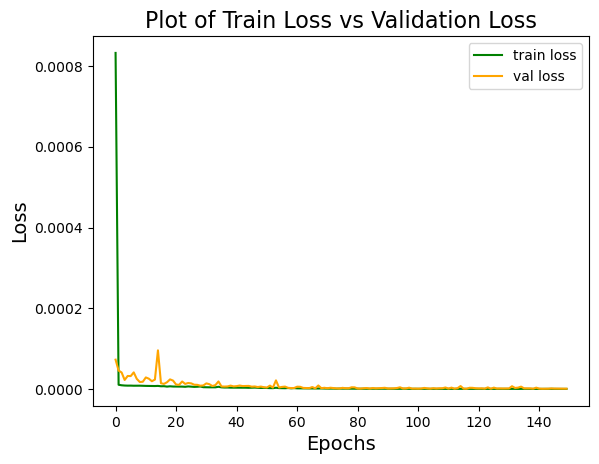

In [66]:
# Plotting tuned LSTM model's train and validation loss
plt.title('Plot of Train Loss vs Validation Loss', fontsize=16)
plt.plot(lstm_tuned_history.history['loss'], color='green', label='train loss')
plt.plot(lstm_tuned_history.history['val_loss'], color='orange', label='val loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

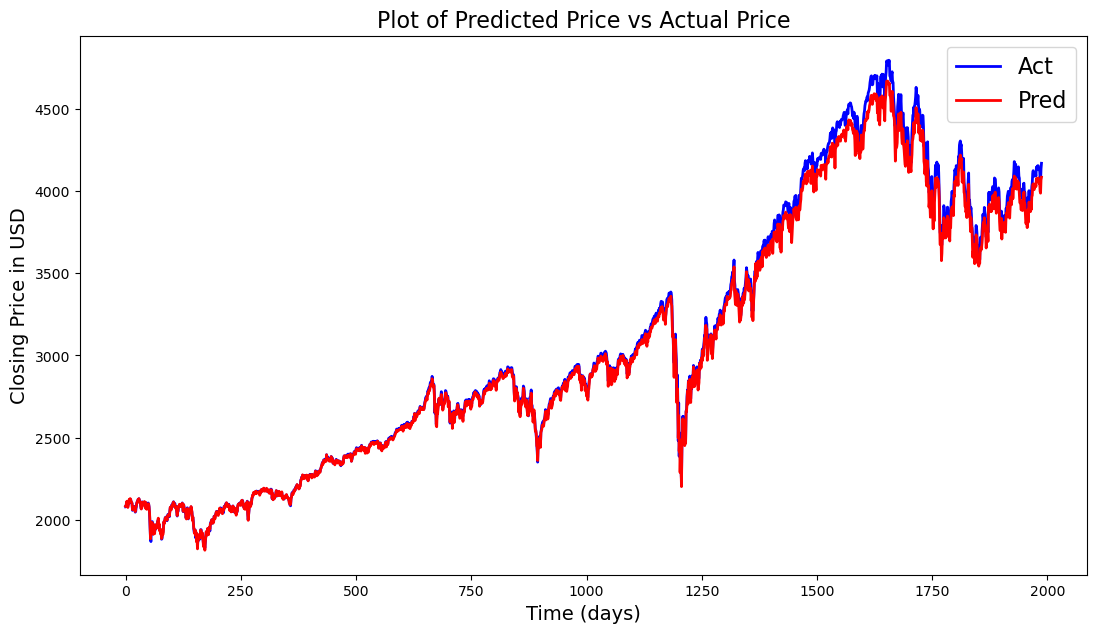

In [56]:
# Plotting tuned LSTM model's predicted price vs real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, color='blue', label='Act', linewidth=2)
ax.plot(lstm_tuned_predict, color='red', label='Pred', linewidth=2)
ax.set_xlabel('Time (days)', fontsize=14)
ax.set_ylabel('Closing Price in USD', fontsize=14)
ax.set_title('Plot of Predicted Price vs Actual Price', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [57]:
# Generating RMSE and MAE results of tuned LSTM model
metrics(real_price, lstm_tuned_predict)

RMSE = 50.19181384704696
MAE = 34.3016153561997


### 4.6 Tuned LSTM Model with Early Stopping

In [58]:
# Defining early stopping mechanism
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",         # Metric to monitor early stopping process
    patience=10,                # Number of epochs to wait before stopping the training process if there is no improvement
    min_delta=0,                # Setting 0 as min threshold change in val_loss before considered an improvement
    verbose=2,                  # Value of 2 will print information about the early stopping process 
    mode="auto",                 
    restore_best_weights=True ) # Set to 'True' to restore the weights to its best performing weight before loss occurs

In [59]:
# Model training

# Setting seed
set_seed(10)

# Fitting tuned LSTM model with training data and early stopping call back
lstm_tuned_es_history = lstm_tuned.fit(x_train, y_train, epochs = 150, validation_split = 0.2, batch_size = 32, 
                                       callbacks= [early_stopping])

Epoch 1/150
201/201 [==============================] - 3s 12ms/step - loss: 1.3050e-06 - val_loss: 1.5088e-06
Epoch 2/150
201/201 [==============================] - 2s 12ms/step - loss: 1.1159e-06 - val_loss: 1.9191e-06
Epoch 3/150
201/201 [==============================] - 2s 11ms/step - loss: 1.0200e-06 - val_loss: 2.4502e-06
Epoch 4/150
201/201 [==============================] - 2s 11ms/step - loss: 1.0264e-06 - val_loss: 4.9497e-06
Epoch 5/150
201/201 [==============================] - 2s 11ms/step - loss: 9.7949e-07 - val_loss: 1.5262e-06
Epoch 6/150
201/201 [==============================] - 2s 12ms/step - loss: 1.2035e-06 - val_loss: 7.1492e-06
Epoch 7/150
201/201 [==============================] - 2s 11ms/step - loss: 1.0303e-06 - val_loss: 4.9889e-06
Epoch 8/150
201/201 [==============================] - 2s 11ms/step - loss: 1.0569e-06 - val_loss: 4.8228e-06
Epoch 9/150
201/201 [==============================] - 2s 11ms/step - loss: 1.1873e-06 - val_loss: 2.1940e-06
Epoch 10/1

In [60]:
# Predicting using regularized-tuned LSTM model
lstm_tuned_es_predict = lstm_tuned.predict(x_test)

#Inverse scaling predicted values
lstm_tuned_es_predict = y_scaler.inverse_transform(lstm_tuned_es_predict)

63/63 [==============================] - 0s 3ms/step


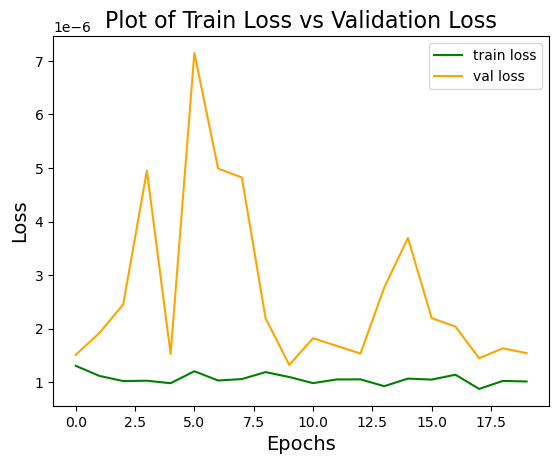

In [67]:
# Plotting regularized-tuned LSTM model's train and validation loss
plt.title('Plot of Train Loss vs Validation Loss', fontsize=16)
plt.plot(lstm_tuned_es_history.history['loss'], color='green', label='train loss')
plt.plot(lstm_tuned_es_history.history['val_loss'], color='orange', label='val loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

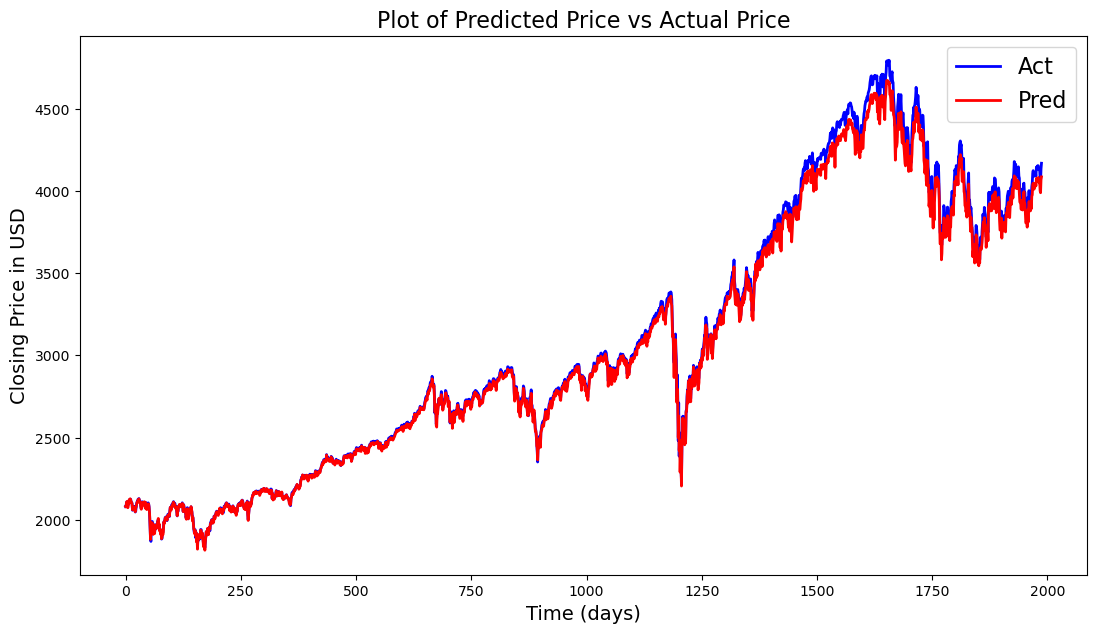

In [62]:
# Plotting regularized-tuned LSTM model's predicted price vs real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, color='blue', label='Act', linewidth=2)
ax.plot(lstm_tuned_es_predict, color='red', label='Pred', linewidth=2)
ax.set_xlabel('Time (days)', fontsize=14)
ax.set_ylabel('Closing Price in USD', fontsize=14)
ax.set_title('Plot of Predicted Price vs Actual Price', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [63]:
# Generating RMSE and MAE results of regurlarized-tuned LSTM model
metrics(real_price, lstm_tuned_es_predict)

RMSE = 48.739027851031636
MAE = 33.94682898415886


# 5.0 Conclusion

- LSTM architectures perform better than GRU architectures in predicting stock indices with larger time steps (30 days).
- The optimization techniques employed such as hyperparameter tuning and early stopping regularization have proved to enhance the overall predictive performance of the LSTM model, by lowering its RMSE and MAE values to 48.739 and 33.947 respectively.
- Based on the 'Plot of Predicted Price vs Actual Price' chart of the regularized-tuned LSTM models, the model was able to closely follow the actual price trend with some slight underestimations. More importantly, it managed to successfully capture the peaks and troughs of the S&P500 closing prices, which is a crucial feature for investors to leverage the stock market since predicting the peaks and troughs enables investors to understand their investment risks and opportunities.
- The predictions of the regularized-tuned LSTM model employed in this study were relatively accurate with an average error of ± USD40 and could hold valuable insights for investors to make inform decisions when investing.
